# Graphene band structure

This example plots the band structure of graphene, a 2D material. 2D band
structures are not supported natively (yet), so we manually build a custom
path in reciprocal space.

n     Energy            log10(ΔE)   log10(Δρ)   Diag   Δtime
---   ---------------   ---------   ---------   ----   ------
  1   -11.15659284216                   -0.60    5.9    192ms
  2   -11.16017367835       -2.45       -1.30    1.1    135ms
  3   -11.16039763020       -3.65       -2.32    2.3    169ms
  4   -11.16041617615       -4.73       -3.15    2.6    434ms
  5   -11.16041701936       -6.07       -3.44    2.7    140ms
  6   -11.16041703689       -7.76       -3.61    1.4    113ms
  7   -11.16041704784       -7.96       -3.96    1.3    110ms
  8   -11.16041705044       -8.59       -4.42    1.7    123ms
  9   -11.16041705124       -9.09       -4.74    2.1    124ms
 10   -11.16041705138       -9.86       -4.96    1.6    125ms
 11   -11.16041705142      -10.36       -5.16    1.6    115ms
 12   -11.16041705144      -10.70       -5.45    1.6    116ms
 13   -11.16041705145      -11.38       -5.85    1.6    124ms
 14   -11.16041705145      -12.04       -6.42    2.3    134ms


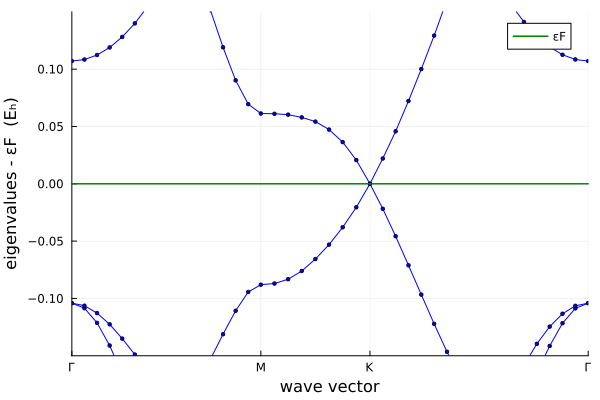

In [1]:
using DFTK
using LinearAlgebra
using Plots
using PseudoPotentialData
using Unitful
using UnitfulAtomic

# Define the convergence parameters (these should be increased in production)
L = 20  # height of the simulation box
kgrid = [6, 6, 1]
Ecut = 15
temperature = 1e-3

# Define the geometry and pseudopotential
a = 4.66  # lattice constant
a1 = a*[1/2,-sqrt(3)/2, 0]
a2 = a*[1/2, sqrt(3)/2, 0]
a3 = L*[0  , 0        , 1]
lattice = [a1 a2 a3]
C1 = [1/3,-1/3,0.0]  # in reduced coordinates
C2 = -C1
positions = [C1, C2]
C = ElementPsp(:C, PseudoFamily("cp2k.nc.sr.pbe.v0_1.semicore.gth"))
atoms = [C, C]

# Run SCF
model = model_DFT(lattice, atoms, positions; functionals=PBE(), temperature)
basis = PlaneWaveBasis(model; Ecut, kgrid)
scfres = self_consistent_field(basis)

# Construct 2D path through Brillouin zone
kpath = irrfbz_path(model; dim=2, space_group_number=13)  # graphene space group number
bands = compute_bands(scfres, kpath; kline_density=20)
plot_bandstructure(bands)